In [1]:
import numpy as np
import nlfe2d as nlfe
import beef
from beef.newmark import factors as newmark_factors, factors_from_alpha

%matplotlib inline
import matplotlib.pyplot as plt
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style(theme='default', gridlines='--', figsize=(8, 6), context='talk', fscale=1.25)

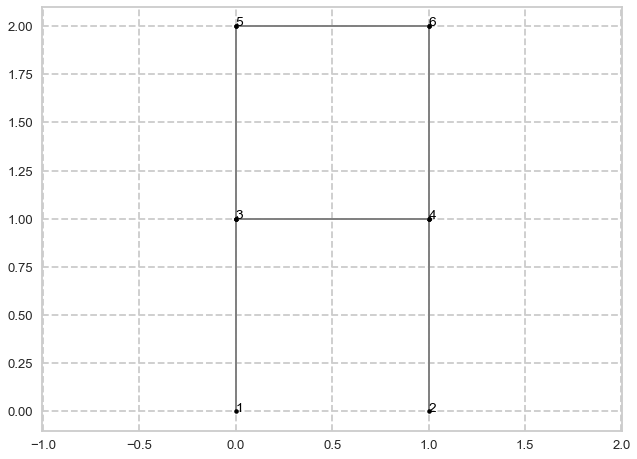

In [2]:
props_massless = nlfe.SectionProperties(E=10/2, A=10, I=10.0/12.0, m=0)
props_rigid = nlfe.SectionProperties(E=210e6, A=10000, I=10000000, m=1)
properties = [[props_massless]*4, [props_rigid]*2]
properties = [a for b in properties for a in b] #unwrap

a = 1.0
b = 1.0

node_matrix = np.array([[1, 0, 0],
                       [2, b, 0],
                       [3, 0, 1*a],
                       [4, b, 1*a],
                       [5, 0, 2*a],
                       [6, b, 2*a]])

element_matrix = np.array([[1, 1, 3],
                          [2, 2, 4],
                          [3, 3, 5],
                          [4, 4, 6],
                          [101, 3, 4],
                          [102, 5, 6]])

constraints = [nlfe.Constraint([1,2], dofs='all')]
part = nlfe.Part(node_matrix, element_matrix, properties, constraints)
a = part.plot(plot_nodes=True, node_labels=True) #plot part for reference
_ = a.axis('equal')
a.grid('on')

In [3]:
M = part.L.T @ part.m @ part.L
K = part.L.T @ part.k @ part.L

# Eigenvalue solution for reference
d,__ = np.linalg.eig(np.linalg.inv(M) @ K)
# print(np.linalg.inv(M) @ K)
# print(d)
# print(np.sqrt(np.sort(np.abs(d))))
omega = np.sort(np.sqrt(d))

# print(omega_1)
for row in range(6):
    print(part.elements[4].m[row,:])

[0.33333333 0.         0.         0.16666667 0.         0.        ]
[ 0.          0.37142857  0.05238095  0.          0.12857143 -0.03095238]
[ 0.          0.05238095  0.00952381  0.          0.03095238 -0.00714286]
[0.16666667 0.         0.         0.33333333 0.         0.        ]
[ 0.          0.12857143  0.03095238  0.          0.37142857 -0.05238095]
[ 0.         -0.03095238 -0.00714286  0.         -0.05238095  0.00952381]


In [4]:
# Simulation settings
n_periods = 10
samples_per_load_period = 50
nmfactors = newmark.factors('constant')
beta, gamma = nmfactors['beta'], nmfactors['gamma']

# Construct force history
t = np.arange(0, T[freq_dof]*n_periods, T[freq_dof]/samples_per_load_period)
f = np.zeros([M.shape[0], len(t)])
# f[load_dof, :] = np.linspace(0, 1000, len(t)) # Either this
f[load_dof, :] = np.sin(omega[freq_dof]*t)   # or this

# Define initial conditions (at rest)
u0 = f[:, 0]*0
udot0 = f[:, 0]*0

NameError: name 'newmark' is not defined